# Predict the Sorting Time using Simple Linear Regression

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')


In [2]:
df=pd.read_csv('delivery_time.csv')

In [3]:
df

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


# Checking If there are any NA values in the dataset

In [4]:
df.isna().sum()


Delivery Time    0
Sorting Time     0
dtype: int64

# Understanding the Nature of data by Performing Business Moments

In [6]:
df.skew


<bound method DataFrame.skew of     Delivery Time  Sorting Time
0           21.00            10
1           13.50             4
2           19.75             6
3           24.00             9
4           29.00            10
5           15.35             6
6           19.00             7
7            9.50             3
8           17.90            10
9           18.75             9
10          19.83             8
11          10.75             4
12          16.68             7
13          11.50             3
14          12.03             3
15          14.88             4
16          13.75             6
17          18.11             7
18           8.00             2
19          17.83             7
20          21.50             5>

In [7]:
df.mean

<bound method DataFrame.mean of     Delivery Time  Sorting Time
0           21.00            10
1           13.50             4
2           19.75             6
3           24.00             9
4           29.00            10
5           15.35             6
6           19.00             7
7            9.50             3
8           17.90            10
9           18.75             9
10          19.83             8
11          10.75             4
12          16.68             7
13          11.50             3
14          12.03             3
15          14.88             4
16          13.75             6
17          18.11             7
18           8.00             2
19          17.83             7
20          21.50             5>

In [8]:
df['Delivery Time'].mean()

16.79095238095238

In [9]:
df['Sorting Time'].mean()

6.190476190476191

In [10]:
df.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [11]:
df.median()

Delivery Time    17.83
Sorting Time      6.00
dtype: float64

In [12]:
df.var()

Delivery Time    25.754619
Sorting Time      6.461905
dtype: float64

In [13]:
df.std

<bound method DataFrame.std of     Delivery Time  Sorting Time
0           21.00            10
1           13.50             4
2           19.75             6
3           24.00             9
4           29.00            10
5           15.35             6
6           19.00             7
7            9.50             3
8           17.90            10
9           18.75             9
10          19.83             8
11          10.75             4
12          16.68             7
13          11.50             3
14          12.03             3
15          14.88             4
16          13.75             6
17          18.11             7
18           8.00             2
19          17.83             7
20          21.50             5>

# Understanding the relationship between two features i,e DeliveryTime and SortingTime

In [55]:
df.corr()


,Delivery Time,Sorting Time,log_Sorting_Time,sqr_Sorting,reg_sorting,exp_sorting
Delivery Time,1.000000,0.825997,0.834894,0.834150,-0.819131,0.835162
Sorting Time,0.825997,1.000000,0.984874,0.994704,-0.937480,0.985891
log_Sorting_Time,0.834894,0.984874,1.000000,0.997463,-0.983069,0.999972
sqr_Sorting,0.834150,0.994704,0.997463,1.000000,-0.967854,0.997854
reg_sorting,-0.819131,-0.937480,-0.983069,-0.967854,1.000000,-0.982176
exp_sorting,0.835162,0.985891,0.999972,0.997854,-0.982176,1.000000


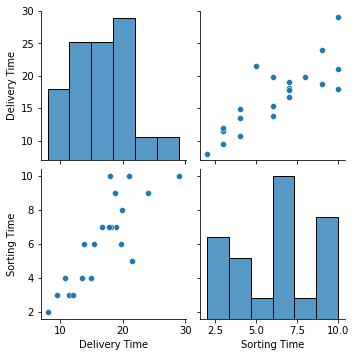

In [15]:
sns.set_style=('darkgrid')
sns.pairplot(df)

<AxesSubplot:xlabel='Sorting Time', ylabel='Delivery Time'>

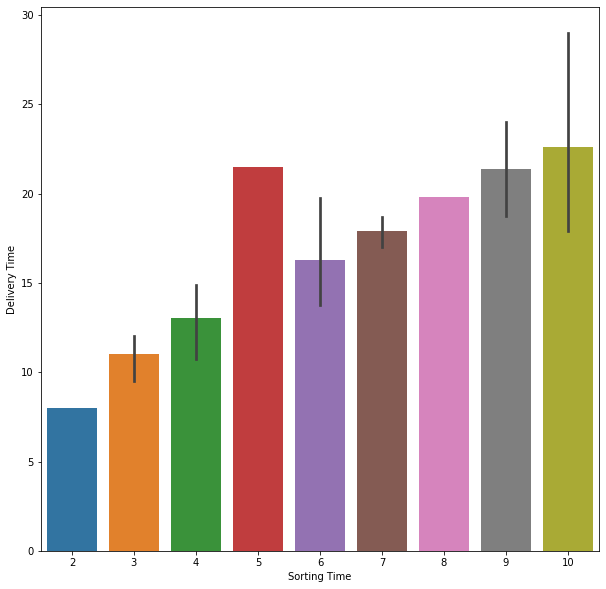

In [16]:
import matplotlib.pyplot as plt 
f, ax = plt.subplots(figsize=(10,10))
sns.barplot(x='Sorting Time',y='Delivery Time',data=df)


(array([1., 3., 3., 1., 0., 3., 4., 1., 2., 3.]),
 array([ 2. ,  2.8,  3.6,  4.4,  5.2,  6. ,  6.8,  7.6,  8.4,  9.2, 10. ]),
 <BarContainer object of 10 artists>)

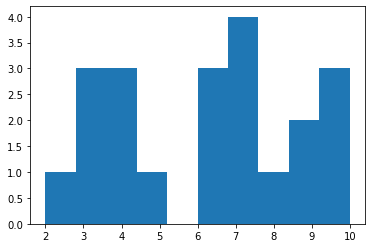

In [17]:
plt.hist(df['Sorting Time'])

(array([2., 3., 2., 2., 4., 4., 2., 1., 0., 1.]),
 array([ 8. , 10.1, 12.2, 14.3, 16.4, 18.5, 20.6, 22.7, 24.8, 26.9, 29. ]),
 <BarContainer object of 10 artists>)

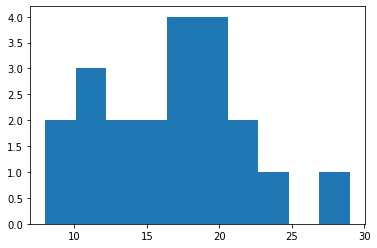

In [18]:
plt.hist(df['Delivery Time'])

# checking if there are any outliers present in our dataset or not

{'whiskers': [<matplotlib.lines.Line2D at 0x15e3bd5cd30>,
 'caps': [<matplotlib.lines.Line2D at 0x15e3bd6b370>,
 'boxes': [<matplotlib.lines.Line2D at 0x15e3bd5ca00>],
 'medians': [<matplotlib.lines.Line2D at 0x15e3bd6ba00>],
 'fliers': [<matplotlib.lines.Line2D at 0x15e3bd6bd60>],
 'means': []}

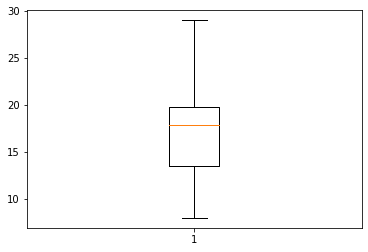

In [19]:
plt.boxplot(df['Delivery Time'])


{'whiskers': [<matplotlib.lines.Line2D at 0x15e3bdb5d00>,
 'caps': [<matplotlib.lines.Line2D at 0x15e3bdc53a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x15e3bdb59a0>],
 'medians': [<matplotlib.lines.Line2D at 0x15e3bdc5a60>],
 'fliers': [<matplotlib.lines.Line2D at 0x15e3bdc5dc0>],
 'means': []}

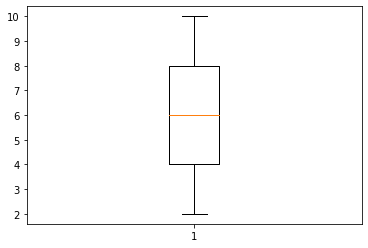

In [20]:
plt.boxplot(df['Sorting Time'])

# Checking the distrubution of the data

<AxesSubplot:xlabel='Sorting Time', ylabel='Density'>

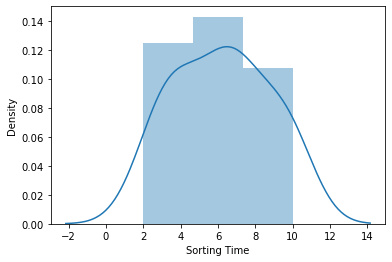

In [21]:
sns.distplot(df['Sorting Time'])


<AxesSubplot:xlabel='Delivery Time', ylabel='Density'>

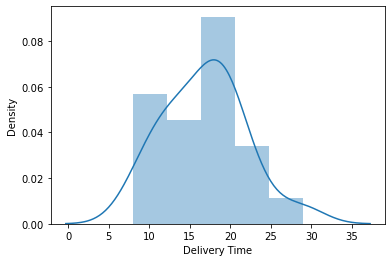

In [22]:
sns.distplot(df['Delivery Time'])


# checking the nature of relationship between two variables i,e Delivery Time and Sorting Time

<AxesSubplot:xlabel='Delivery Time', ylabel='Sorting Time'>

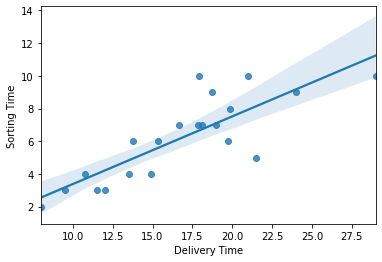

In [23]:
sns.regplot(x='Delivery Time',y='Sorting Time',data=df) 



#It posseses Positive Relationship 
#If Sorting Time increases Delivery Time also increases,
#It means we can predict Delivery Time using Sorting Time 


# Transformations

<AxesSubplot:xlabel='log_Sorting_Time', ylabel='Density'>

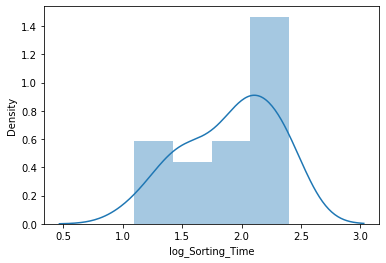

In [24]:
df['log_Sorting_Time']=np.log(df['Sorting Time']+1)
sns.distplot(df['log_Sorting_Time'])
#LogTransformation

<AxesSubplot:xlabel='sqr_Sorting', ylabel='Density'>

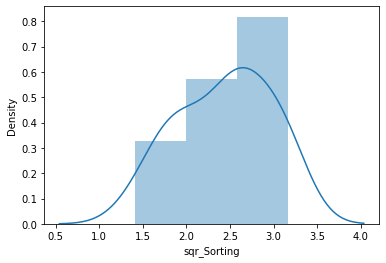

In [25]:
#Square Root Transformation 

df['sqr_Sorting']=df['Sorting Time']**(1/2)

sns.distplot(df['sqr_Sorting'])


<AxesSubplot:xlabel='reg_sorting', ylabel='Density'>

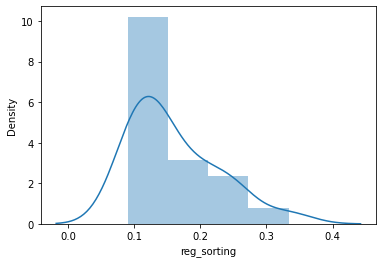

In [26]:
df['reg_sorting']=1/(df['Sorting Time']+1)
sns.distplot(df['reg_sorting'])

<AxesSubplot:xlabel='exp_sorting', ylabel='Density'>

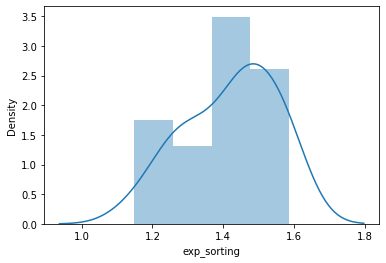

In [27]:
df['exp_sorting']=df['Sorting Time']**(1/5)
sns.distplot(df['exp_sorting'])

In [28]:
x=df['Sorting Time']
y=df['Delivery Time']

# buliding the model
without performing EDA 

In [29]:
import statsmodels.formula.api as smf
model=smf.ols("y~x",data=df).fit()


In [30]:
model.params

Intercept    6.582734
x            1.649020
dtype: float64

In [31]:
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Sat, 08 May 2021   Prob (F-statistic):           3.98e-06
Time:                        13:27:47   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5827      1.722      3.823      0.001       2.979      10.186
x              1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
model.rsquared


0.6822714748417231

#  Rsquared is not very strong
So We will perform EDA 

In [33]:
model_influence=model.get_influence() 

In [34]:
(c,_)=model_influence.cooks_distance

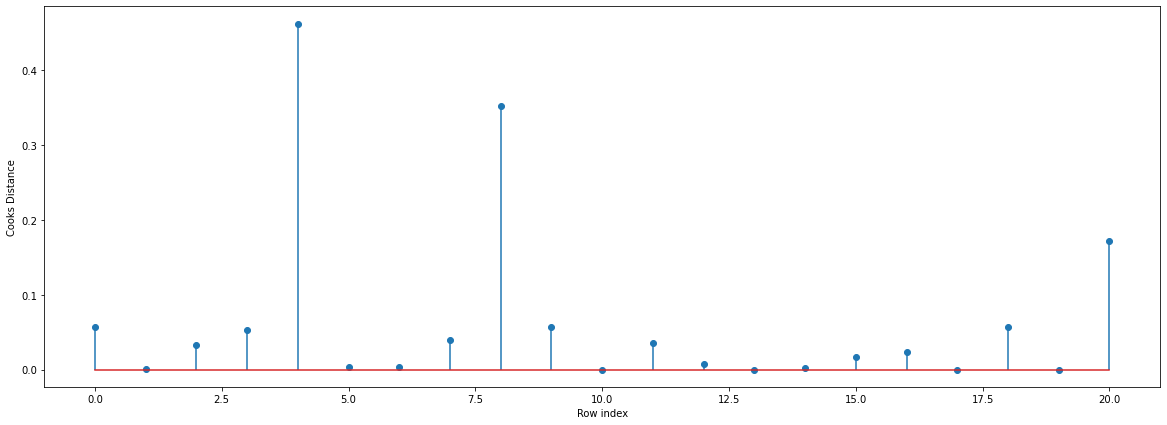

In [35]:
import matplotlib.pyplot as plt
fig=plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(df)),np.round(c,3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [36]:
(np.argmax(c),np.max(c))

(4, 0.4620530412650319)

<function matplotlib.pyplot.show(close=None, block=None)>

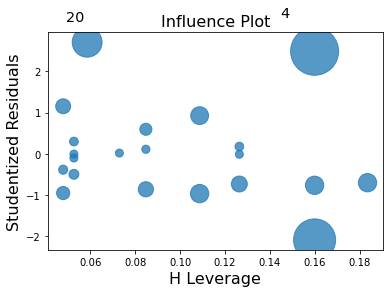

In [37]:
from statsmodels.graphics.regressionplots import influence_plot as ip
ip(model)
plt.show

In [38]:
k=df.shape[1]
n=df.shape[0]
levarage_cutoff=3*((k + 1)/n)

# This datapoints should be removed 
they are influencing our model

In [39]:
df[df.index.isin([0,4,7,8,9,11,15,16,17,20])]


,Delivery Time,Sorting Time,log_Sorting_Time,sqr_Sorting,reg_sorting,exp_sorting
0,21.00,10,2.397895,3.162278,0.090909,1.584893
4,29.00,10,2.397895,3.162278,0.090909,1.584893
7,9.50,3,1.386294,1.732051,0.250000,1.245731
8,17.90,10,2.397895,3.162278,0.090909,1.584893
9,18.75,9,2.302585,3.000000,0.100000,1.551846
11,10.75,4,1.609438,2.000000,0.200000,1.319508
15,14.88,4,1.609438,2.000000,0.200000,1.319508
16,13.75,6,1.945910,2.449490,0.142857,1.430969
17,18.11,7,2.079442,2.645751,0.125000,1.475773
20,21.50,5,1.791759,2.236068,0.166667,1.379730


In [40]:
df.median()

Delivery Time       17.830000
Sorting Time         6.000000
log_Sorting_Time     1.945910
sqr_Sorting          2.449490
reg_sorting          0.142857
exp_sorting          1.430969
dtype: float64

In [41]:
df.head(10)

,Delivery Time,Sorting Time,log_Sorting_Time,sqr_Sorting,reg_sorting,exp_sorting
0,21.00,10,2.397895,3.162278,0.090909,1.584893
1,13.50,4,1.609438,2.000000,0.200000,1.319508
2,19.75,6,1.945910,2.449490,0.142857,1.430969
3,24.00,9,2.302585,3.000000,0.100000,1.551846
4,29.00,10,2.397895,3.162278,0.090909,1.584893
5,15.35,6,1.945910,2.449490,0.142857,1.430969
6,19.00,7,2.079442,2.645751,0.125000,1.475773
7,9.50,3,1.386294,1.732051,0.250000,1.245731
8,17.90,10,2.397895,3.162278,0.090909,1.584893
9,18.75,9,2.302585,3.000000,0.100000,1.551846


In [42]:
df2=df

# Removing The Noisy Data

In [43]:
df3=df2.drop(df2.index[[0,4,7,8,9,11,15,16,17,20]],axis=0)


In [44]:
df3

,Delivery Time,Sorting Time,log_Sorting_Time,sqr_Sorting,reg_sorting,exp_sorting
1,13.50,4,1.609438,2.000000,0.200000,1.319508
2,19.75,6,1.945910,2.449490,0.142857,1.430969
3,24.00,9,2.302585,3.000000,0.100000,1.551846
5,15.35,6,1.945910,2.449490,0.142857,1.430969
6,19.00,7,2.079442,2.645751,0.125000,1.475773
10,19.83,8,2.197225,2.828427,0.111111,1.515717
12,16.68,7,2.079442,2.645751,0.125000,1.475773
13,11.50,3,1.386294,1.732051,0.250000,1.245731
14,12.03,3,1.386294,1.732051,0.250000,1.245731
18,8.00,2,1.098612,1.414214,0.333333,1.148698


# creating another model after performing EDA

In [45]:
y1=df3['Delivery Time']
x1=df3['Sorting Time']


In [46]:
model_2=smf.ols("y1~x1",data=df3).fit()

In [47]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     y1   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     80.67
Date:                Sat, 08 May 2021   Prob (F-statistic):           8.68e-06
Time:                        13:27:48   Log-Likelihood:                -19.238
No. Observations:                  11   AIC:                             42.48
Df Residuals:                       9   BIC:                             43.27
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.3947      1.282      4.207      0.002       2.494       8.296
x1             1.9053      0.212      8.981      0.000       1.425       2.385
==============================================================================
Omnibus:                        0.822   Durbin-Watson:                   1.565
Prob(Omnibus):                  0.663   Jarque-Bera (JB):                0.524
Skew:                           0.479   Prob(JB):                        0.770
Kurtosis:                       2.527   Cond. No.                         17.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
model_2.rsquared

0.8996272476808775

In [49]:
model_2.rsquared_adj

0.8884747196454195

In [50]:
final_model=model_2

# Inserting new Data in the form of series

In [51]:
newdata=pd.Series([8]) 



# Creating a dataframe of above data

In [52]:
data_pred=pd.DataFrame(newdata,columns=['x1'])

In [53]:
final_model.predict(data_pred)


0    20.637059
dtype: float64

# According to our model,If Sorting time is 8 Minutes then Delivery Time should approxiamately equal to 20.63 Minutes